# Getting started

### CLEF 2025 - CheckThat! Lab  - Task 4 Scientific Web Discourse - Subtask 4b (Scientific Claim Source Retrieval)

This notebook enables participants of subtask 4b to quickly get started. It includes the following:
- Code to upload data, including:
    - code to upload the collection set (CORD-19 academic papers' metadata)
    - code to upload the query set (tweets with implicit references to CORD-19 papers)
- Code to run a baseline retrieval model (BM25)
- Code to evaluate the baseline model

Participants are free to use this notebook and add their own models for the competition.

# 1) Importing data

In [1]:
import numpy as np
import pandas as pd

In [21]:
import os
print(os.getcwd())

/storage/coda1/p-dsgt_clef2025/0/stian40/checkthat-2025-swd/subtask-4b


## 1.a) Import the collection set
The collection set contains metadata of CORD-19 academic papers.

The preprocessed and filtered CORD-19 dataset is available on the Gitlab repository here: https://gitlab.com/checkthat_lab/clef2025-checkthat-lab/-/tree/main/task4?ref_type=heads

Participants should first download the file then upload it on the Google Colab session with the following steps.


In [2]:
# 1) Download the collection set from the Gitlab repository: https://gitlab.com/checkthat_lab/clef2025-checkthat-lab/-/tree/main/task4?ref_type=heads
# 2) Drag and drop the downloaded file to the "Files" section (left vertical menu on Colab)
# 3) Modify the path to your local file path
PATH_COLLECTION_DATA = 'subtask4b_collection_data.pkl' #MODIFY PATH

In [23]:
with open(PATH_COLLECTION_DATA, 'rb') as f:
    print(f.read(100))

b'\x80\x05\x95\x04\x00\x01\x00\x00\x00\x00\x00\x8c\x11pandas.core.frame\x94\x8c\tDataFrame\x94\x93\x94)\x81\x94}\x94(\x8c\x04_mgr\x94\x8c\x1epandas.core.internals.managers\x94\x8c\x0cBlockMa'


In [3]:
#df_collection = pd.read_pickle(PATH_COLLECTION_DATA)
df_collection = pd.read_pickle("subtask4b_collection_data.pkl")

In [6]:
df_collection.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7718 entries, 162 to 1056448
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cord_uid          7718 non-null   object        
 1   source_x          7718 non-null   object        
 2   title             7718 non-null   object        
 3   doi               7677 non-null   object        
 4   pmcid             4959 non-null   object        
 5   pubmed_id         6233 non-null   object        
 6   license           7718 non-null   object        
 7   abstract          7718 non-null   object        
 8   publish_time      7715 non-null   object        
 9   authors           7674 non-null   object        
 10  journal           6668 non-null   object        
 11  mag_id            0 non-null      float64       
 12  who_covidence_id  528 non-null    object        
 13  arxiv_id          20 non-null     object        
 14  label             7718 n

In [8]:
df_collection.head()

,cord_uid,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,label,time,timet
162,umvrwgaw,PMC,Professional and Home-Made Face Masks Reduce E...,10.1371/journal.pone.0002618,PMC2440799,18612429,cc-by,BACKGROUND: Governments are preparing for a po...,2008-07-09,"van der Sande, Marianne; Teunis, Peter; Sabel,...",PLoS One,NaN,NaN,NaN,umvrwgaw,2008-07-09,1215561600
611,spiud6ok,PMC,The Failure of R (0),10.1155/2011/527610,PMC3157160,21860658,cc-by,"The basic reproductive ratio, R (0), is one of...",2011-08-16,"Li, Jing; Blakeley, Daniel; Smith?, Robert J.",Comput Math Methods Med,NaN,NaN,NaN,spiud6ok,2011-08-16,1313452800
918,aclzp3iy,PMC,Pulmonary sequelae in a patient recovered from...,10.4103/0970-2113.99118,PMC3424870,22919170,cc-by-nc-sa,The pandemic of swine flu (H1N1) influenza spr...,2012,"Singh, Virendra; Sharma, Bharat Bhushan; Patel...",Lung India,NaN,NaN,NaN,aclzp3iy,2012-01-01,1325376000
993,ycxyn2a2,PMC,What was the primary mode of smallpox transmis...,10.3389/fcimb.2012.00150,PMC3509329,23226686,cc-by,The mode of infection transmission has profoun...,2012-11-29,"Milton, Donald K.",Front Cell Infect Microbiol,NaN,NaN,NaN,ycxyn2a2,2012-11-29,1354147200
1053,zxe95qy9,PMC,"Lessons from the History of Quarantine, from P...",10.3201/eid1902.120312,PMC3559034,23343512,no-cc,"In the new millennium, the centuries-old strat...",2013-02-03,"Tognotti, Eugenia",Emerg Infect Dis,NaN,NaN,NaN,zxe95qy9,2013-02-03,1359849600


## 1.b) Import the query set

The query set contains tweets with implicit references to academic papers from the collection set.

The preprocessed query set is available on the Gitlab repository here: https://gitlab.com/checkthat_lab/clef2025-checkthat-lab/-/tree/main/task4?ref_type=heads

Participants should first download the file then upload it on the Google Colab session with the following steps.

In [4]:
# 1) Download the query tweets from the Gitlab repository: https://gitlab.com/checkthat_lab/clef2025-checkthat-lab/-/tree/main/task4?ref_type=heads
# 2) Drag and drop the downloaded file to the "Files" section (left vertical menu on Colab)
# 3) Modify the path to your local file path
PATH_QUERY_DATA = 'subtask4b_query_tweets_train.tsv' #MODIFY PATH

In [5]:
df_query = pd.read_csv(PATH_QUERY_DATA, sep = '\t')

In [ ]:
df_query.head()

,tweet_text,cord_uid
0,Oral care in rehabilitation medicine: oral vul...,htlvpvz5
1,this study isn't receiving sufficient attentio...,4kfl29ul
2,"thanks, xi jinping. a reminder that this study...",jtwb17u8
3,Taiwan - a population of 23 million has had ju...,0w9k8iy1
4,Obtaining a diagnosis of autism in lower incom...,tiqksd69


In [ ]:
df_query.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14253 entries, 0 to 14252
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  14253 non-null  object
 1   cord_uid    14253 non-null  object
dtypes: object(2)
memory usage: 222.8+ KB


In [6]:
np.random.seed(88)
df_query = df_query.sample(20)

# 2) Running the baseline
The following code runs a BM25 baseline.


In [7]:
#!pip install rank_bm25
from rank_bm25 import BM25Okapi

In [8]:
# Create the BM25 corpus
corpus = df_collection[:][['title', 'abstract']].apply(lambda x: f"{x['title']} {x['abstract']}", axis=1).tolist()
cord_uids = df_collection[:]['cord_uid'].tolist()
tokenized_corpus = [doc.split(' ') for doc in corpus]
bm25 = BM25Okapi(tokenized_corpus)

In [9]:
text2bm25top = {}

def get_top_cord_uids(query):
    if query in text2bm25top.keys():
        return text2bm25top[query]
    else:
        tokenized_query = query.split(' ')
        doc_scores = bm25.get_scores(tokenized_query)
        indices = np.argsort(-doc_scores)[:1000]
        bm25_topk = [cord_uids[x] for x in indices]

        text2bm25top[query] = bm25_topk
        return bm25_topk


In [10]:
# Retrieve topk candidates using the BM25 model
df_query['bm25_topk'] = df_query['tweet_text'].apply(lambda x: get_top_cord_uids(x))

# 3) Evaluating the baseline
The following code evaluates the BM25 retrieval baseline on the query set using the Mean Reciprocal Rank score (MRR@5).

In [11]:
# Evaluate retrieved candidates using MRR@k
def get_performance_mrr(data, col_gold, col_pred, list_k = [1, 5, 10]):
    d_performance = {}
    for k in list_k:
        data["in_topx"] = data.apply(lambda x: (1/([i for i in x[col_pred][:k]].index(x[col_gold]) + 1) if x[col_gold] in [i for i in x[col_pred][:k]] else 0), axis=1)
        #performances.append(data["in_topx"].mean())
        d_performance[k] = data["in_topx"].mean()
    return d_performance


In [12]:
results = get_performance_mrr(df_query, 'cord_uid', 'bm25_topk')
# Printed MRR@k results in the following format: {k: MRR@k}
print(results)

{1: np.float64(0.5), 5: np.float64(0.5666666666666667), 10: np.float64(0.5722222222222222)}


# 4) Possible solutions

# 4.1) BM25 for Retrieval and LightGBM for Rerank

In [13]:
#!pip install lightgbm
import lightgbm as lgb

In [14]:
#!pip install scikit-learn
#!pip install tqdm

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import lightgbm as lgb
from tqdm import tqdm

In [15]:
def retrieve_paper(paper_ids):
  paper_dict = {}
  for id in paper_ids:
    paper_data = df_collection[df_collection['cord_uid'] == id]
    title = paper_data.iloc[0]['title']
    abstract = paper_data.iloc[0]['abstract']
    paper_dict[id] = {'title': title, 'abstract': abstract}
  return paper_dict

df_query['title_abstract'] = df_query['bm25_topk'].apply(lambda row: retrieve_paper(row))

In [ ]:
#!pip install pandas
#Not used
import pandas as pd

# Set display options to show full DataFrame without truncation
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust width for full view
pd.set_option('display.max_colwidth', None)

In [ ]:
#Prepare TF-IDF feature representation

#Build a corpus from all paper titles and abstracts
corpus = df_collection['title'].fillna('') + ' ' + df_collection['abstract'].fillna('')
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_vectorizer.fit(corpus)


def extract_features(tweet, title, abstract):
    paper_text = f"{title} {abstract}"
    
    # TF-IDF score
    tfidf_tweet = tfidf_vectorizer.transform([tweet])
    tfidf_paper = tfidf_vectorizer.transform([paper_text])
    tfidf_score = cosine_similarity(tfidf_tweet, tfidf_paper)[0][0]
    '''
    # Token overlap, did not improve performance
    tweet_tokens = set(tweet.lower().split())
    paper_tokens = set(paper_text.lower().split())
    token_overlap = len(tweet_tokens & paper_tokens) / len(tweet_tokens | paper_tokens | {1e-9})
    
    # Length difference
    length_diff = abs(len(tweet.split()) - len(paper_text.split())) / 100.0
    
    return [tfidf_score, token_overlap, length_diff]
    '''
    return [tfidf_score] 

#df_query['bm25_cross_encoder_topk'] = df_query.apply(lambda row: rerank_with_crossencoder(row), axis=1)

Defaulting to user installation because normal site-packages is not writeable
distutils: /storage/home/hcoda1/3/stian40/.local/lib/python3.9/site-packages
sysconfig: /storage/home/hcoda1/3/stian40/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None


100%|██████████| 20/20 [00:59<00:00,  2.98s/it]

Feature sample: [[0.13623711]
 [0.22653709]
 [0.09910758]
 [0.17631589]
 [0.21792591]]
Labels: [19980    20]


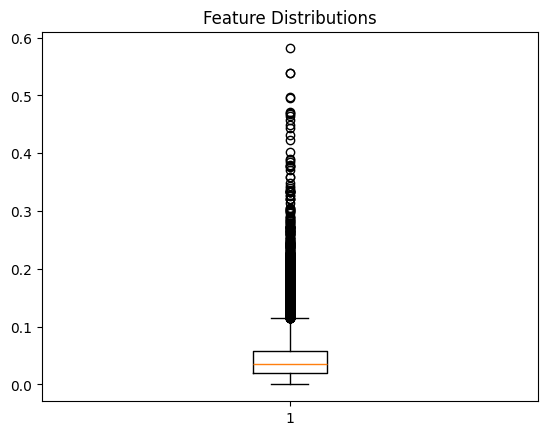

"\nparams = {\n    'objective': 'lambdarank',\n    'metric': 'ndcg',\n    'ndcg_eval_at': [5],\n    'learning_rate': 0.05,\n    'num_leaves': 31,\n    'verbose': 1\n}\n"

In [ ]:
#Training LightGBM model

#!pip install matplotlib
import matplotlib.pyplot as plt

X_train = []
y_train = []
query_groups = []

for _, row in tqdm(df_query.iterrows(), total=len(df_query)):
    tweet = row['tweet_text']
    correct_paper = row['cord_uid']
    title_abstracts = retrieve_paper(row['bm25_topk'])

    group_size = 0
    for pid, data in title_abstracts.items():
        features = extract_features(tweet, data['title'], data['abstract'])
        X_train.append(features)
        y_train.append(1 if pid == correct_paper else 0)
        group_size += 1
    query_groups.append(group_size)

X_train = np.array(X_train)
y_train = np.array(y_train)

#Training LightGBM model
lgb_train = lgb.Dataset(X_train, label=y_train, group=query_groups)

params = {
    'objective': 'lambdarank',
    'metric': 'ndcg',
    'ndcg_eval_at': [5],
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': 1
}

lgb_model = lgb.train(params, lgb_train, num_boost_round=10)

In [ ]:
#Reranking using trained LightGBM

def rerank_with_lgb(row):
    tweet = row['tweet_text']
    title_abstracts = row['title_abstract']

    paper_ids = list(title_abstracts.keys())
    feature_list = []

    for pid in paper_ids:
        data = title_abstracts[pid]
        features = extract_features(tweet, data['title'], data['abstract'])
        feature_list.append(features)

    features_np = np.array(feature_list)
    scores = lgb_model.predict(features_np)

    ranked_indices = np.argsort(scores)[::-1]
    ranked_paper_ids = [paper_ids[i] for i in ranked_indices]

    return ranked_paper_ids

#Apply reranking
df_query['bm25_lgb_topk'] = df_query.apply(lambda row: rerank_with_lgb(row), axis=1)


In [ ]:
#Evaluate using Mean Reciprocal Rank

results = get_performance_mrr(df_query, 'cord_uid', 'bm25_lgb_topk')
print("MRR@k:", results)